<a href="https://colab.research.google.com/github/pavan-potnuru/Bike-sharing-prediction/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Copy of SeoulBikeData.csv',encoding='Unicode_escape')

In [ ]:
dataset.shape

(8760, 14)

In [ ]:
#First Look
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
dataset.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

 **Data Summary**
 
Date : date of ride

Rented Bike Count : number of rented bikes (numerical)

Hour : Hour of the day (numerical)

Temperature(°C) : temperature (numerical)

Humidity(%) : percentage of humidity (numirical)

Wind speed (m/s) : speed of wind in m/s (numerical)

Visibility (10m) : Visibility (numerical)

Dew point temperature(°C) : temperatur (numerical)

Solar Radiation (MJ/m2) (numerical)

Rainfall(mm) (numerical)

Snowfall (cm) (numerical)

Seasons (categorical)

Holiday (categorical)

Functioning Day (categorical)

In [ ]:
dataset.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
df= dataset.copy()

In [ ]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
# changing datatype of column 'Date' to date_type.
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')

In [ ]:
#Creating two new features 'month' and 'day_of_month'

df['month'] = pd.to_datetime(df['Date']).dt.month
df['day_of_month'] = pd.to_datetime(df['Date']).dt.day

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day_of_month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1


## Univariate Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

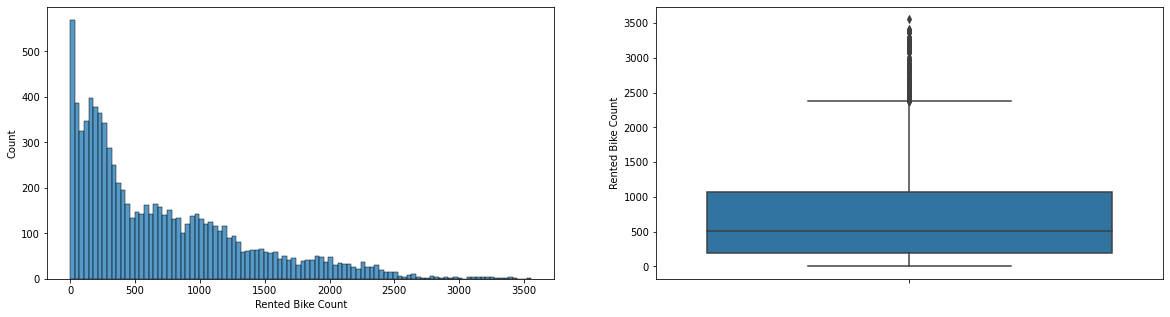

In [ ]:
#Distribution of dependent variable
dep_var = 'Rented Bike Count'

fig, ax = plt.subplots(1,2,figsize = (20,5))
sns.histplot(df[dep_var], bins = 100,ax = ax[0])
sns.boxplot(y = df['Rented Bike Count'], ax = ax[1])
plt.show()

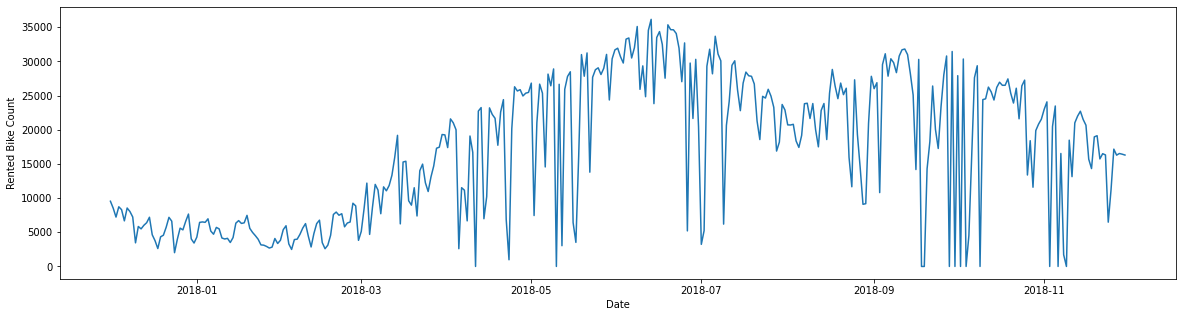

In [ ]:
fig, ax = plt.subplots(1,figsize = (20,5))
df_date_group = df.groupby('Date', as_index=False)['Rented Bike Count'].sum()
df_date_group
sns.lineplot(data=df_date_group, x="Date", y="Rented Bike Count", ax=ax)


In [ ]:
# creating list of numerical independent variables
num_ind_var = list(set(df.describe().columns) - {dep_var})

# creating list of categorical independent variables
cat_ind_var = list(set(df.columns) - set(df.describe().columns))

In [ ]:
num_ind_var

['Wind speed (m/s)',
 'Hour',
 'Visibility (10m)',
 'Humidity(%)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'month',
 'day_of_month',
 'Solar Radiation (MJ/m2)',
 'Temperature(°C)',
 'Dew point temperature(°C)']

In [ ]:
cat_ind_var

['Functioning Day', 'Seasons', 'Holiday', 'Date']

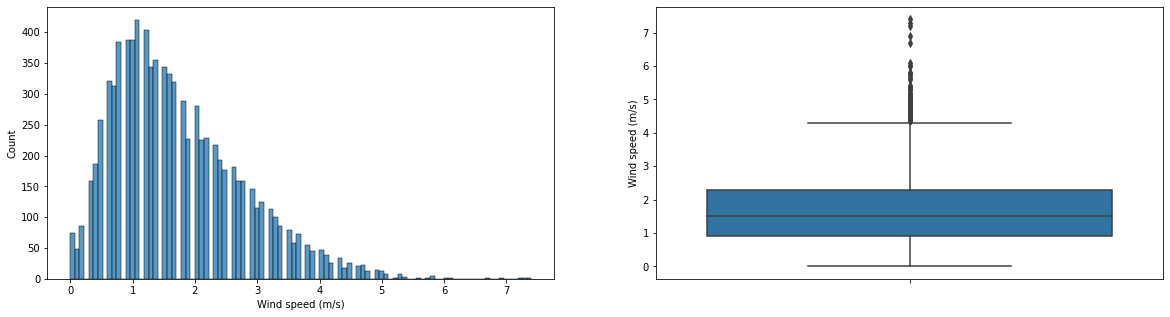

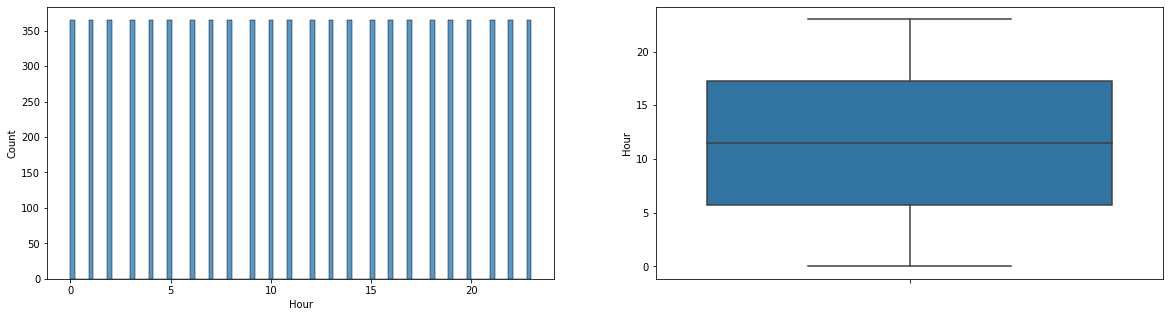

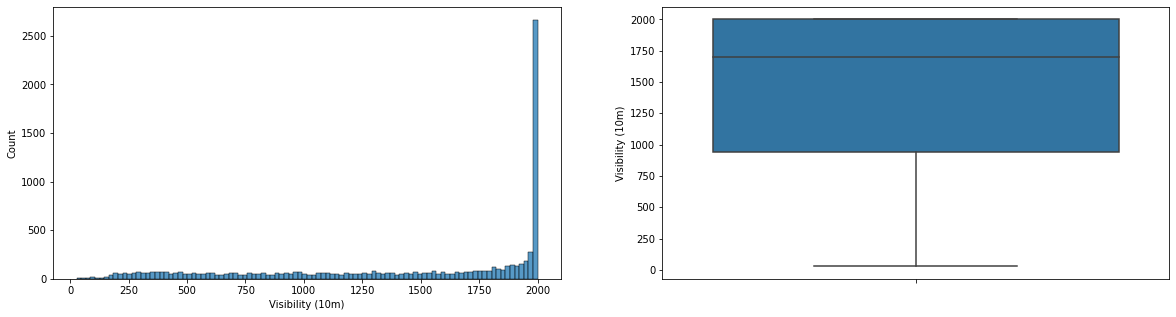

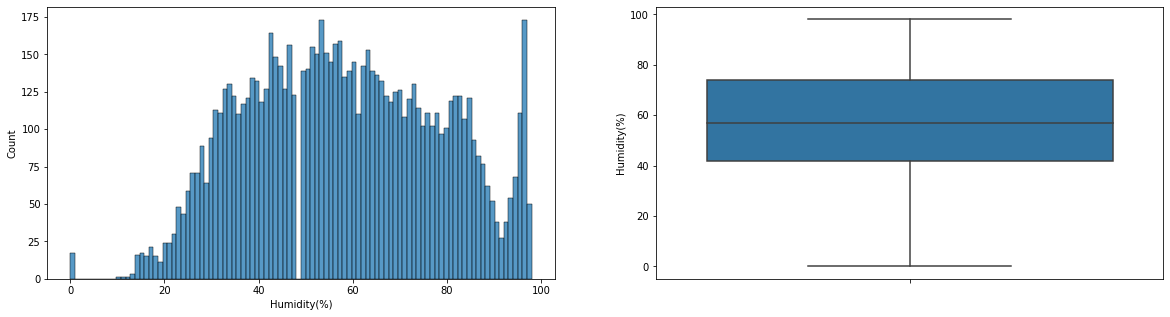

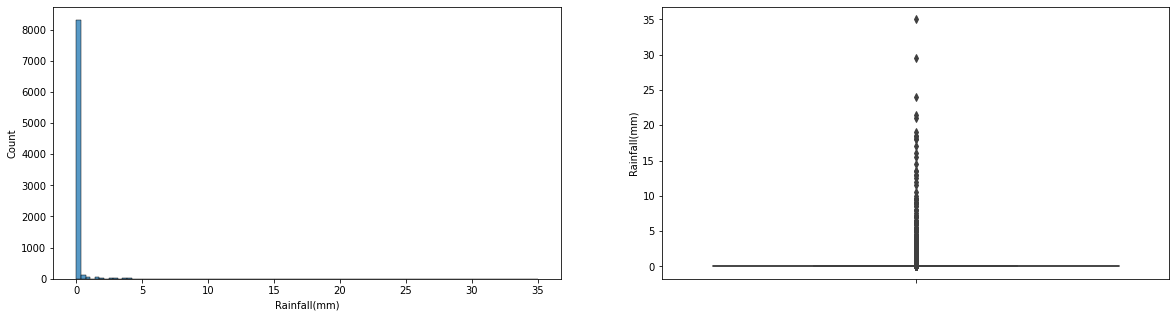

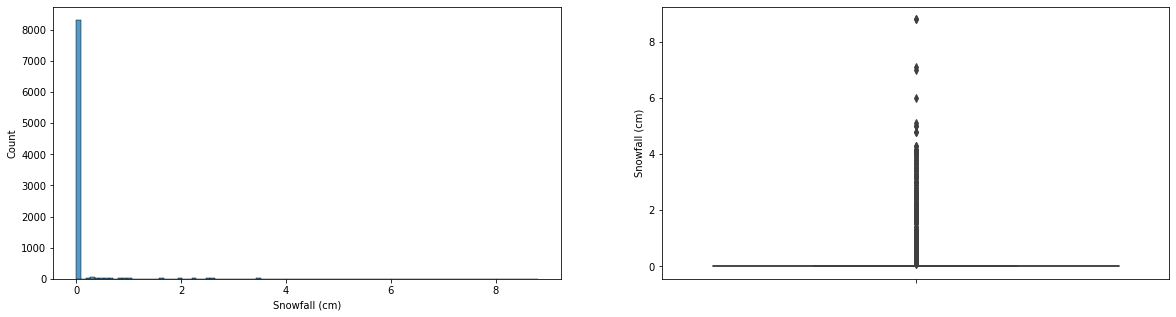

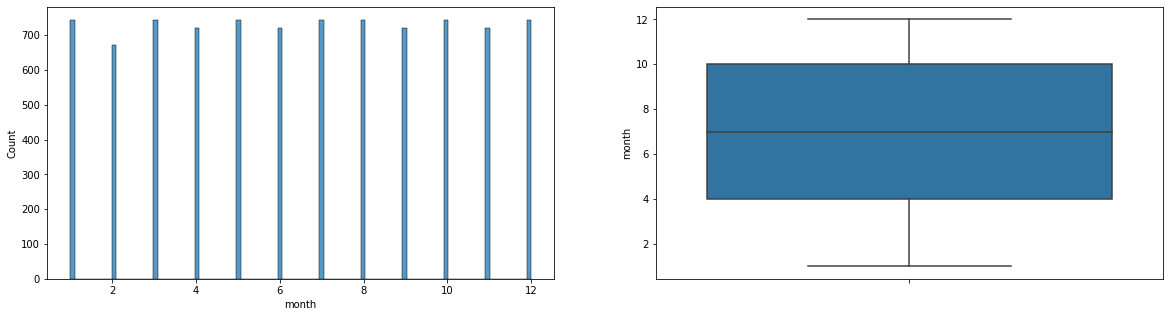

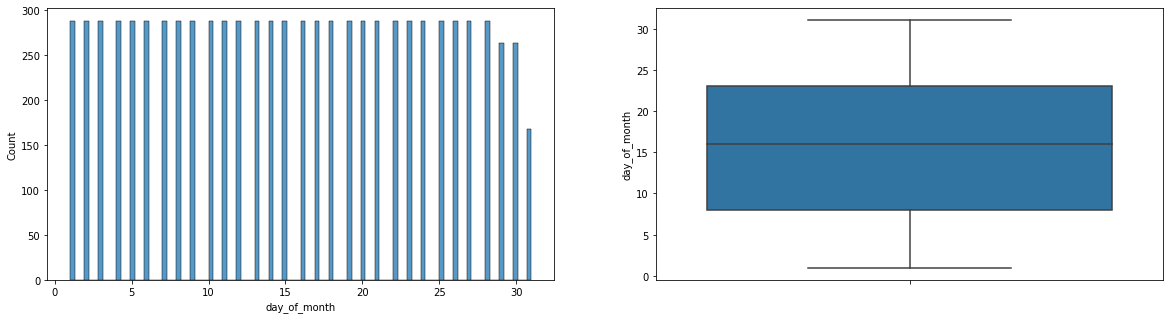

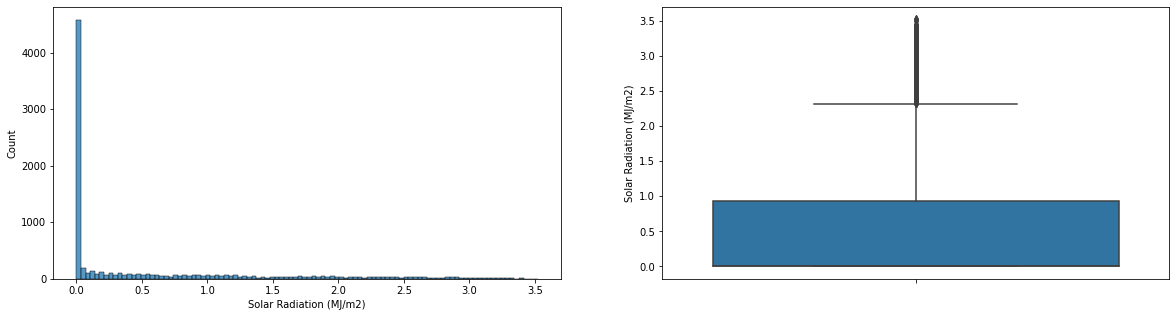

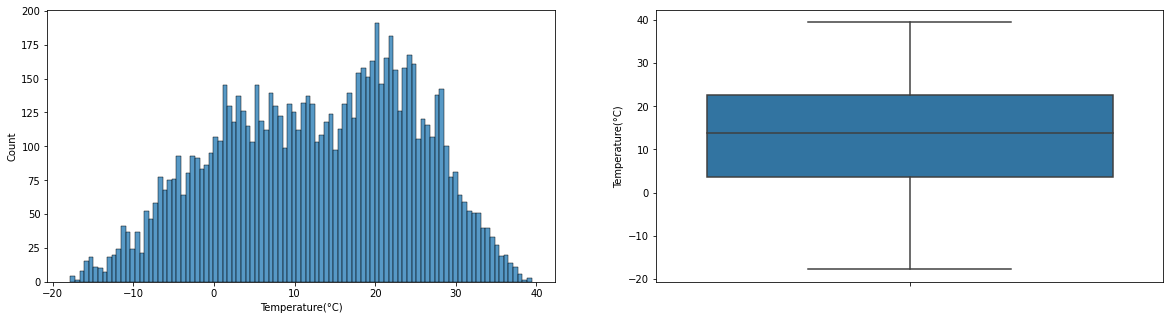

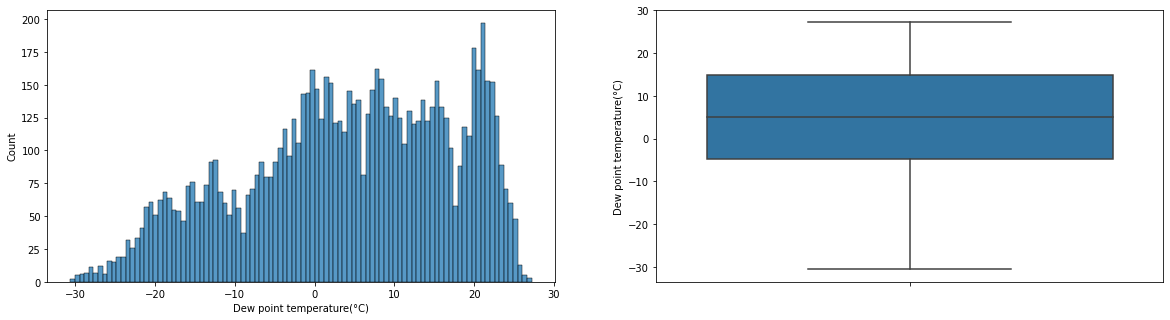

In [ ]:
# distribution and boxplot of all numerical independent variables
for col in num_ind_var:
  fig, ax = plt.subplots(1,2,figsize = (20,5))
  sns.histplot(df[col],bins = 100, ax = ax[0])
  sns.boxplot(y = df[col], ax = ax[1])
  plt.show()

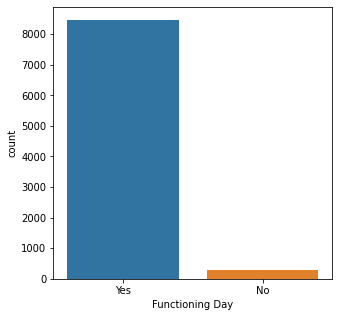

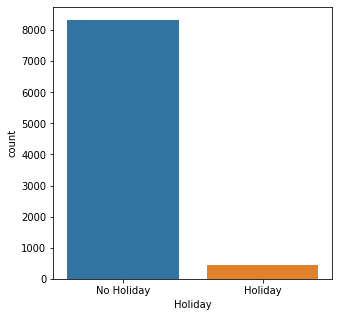

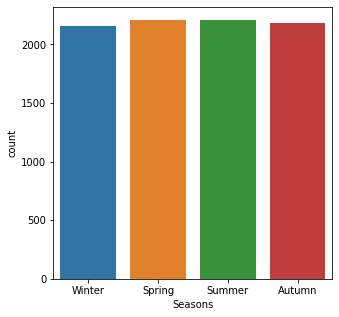

In [ ]:
# Plotting graph for categorical features

for col in ['Functioning Day','Holiday','Seasons']:
  plt.figure(figsize = (5,5))
  sns.countplot(x = df[col])
  plt.show()

## Bivariate Analysis

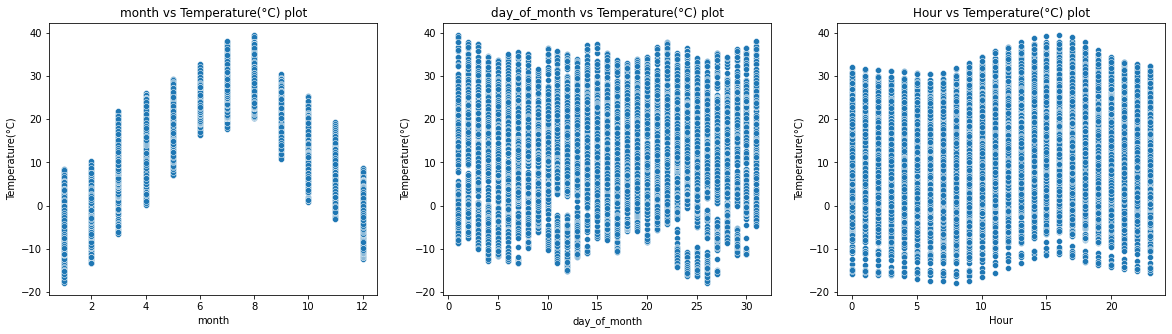

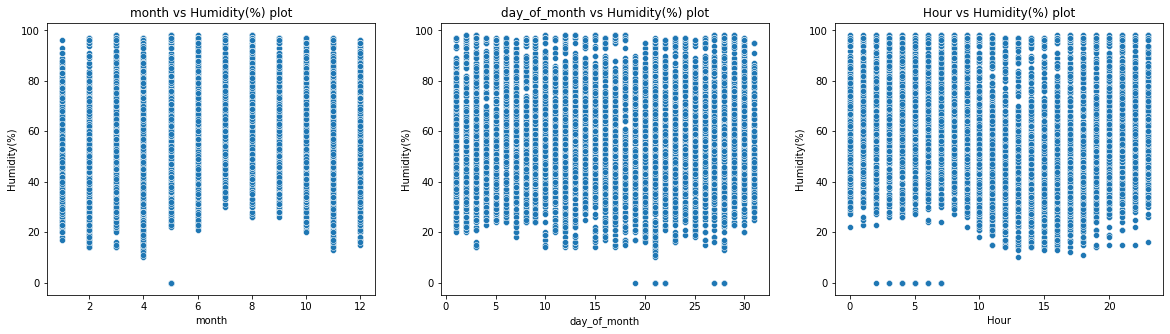

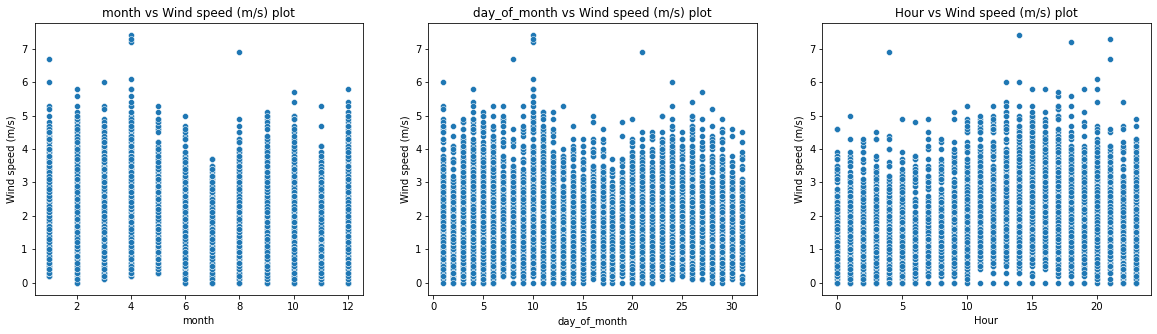

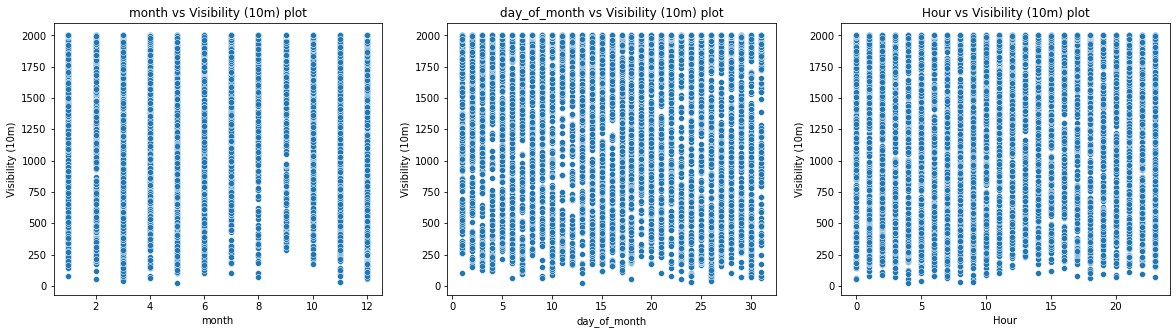

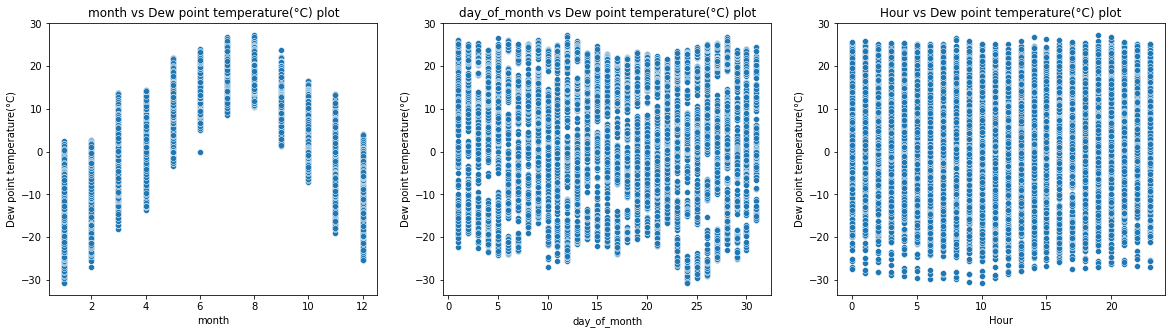

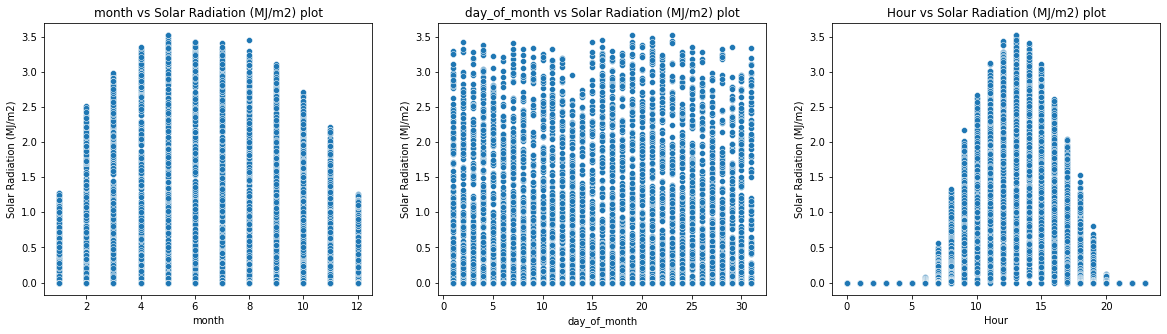

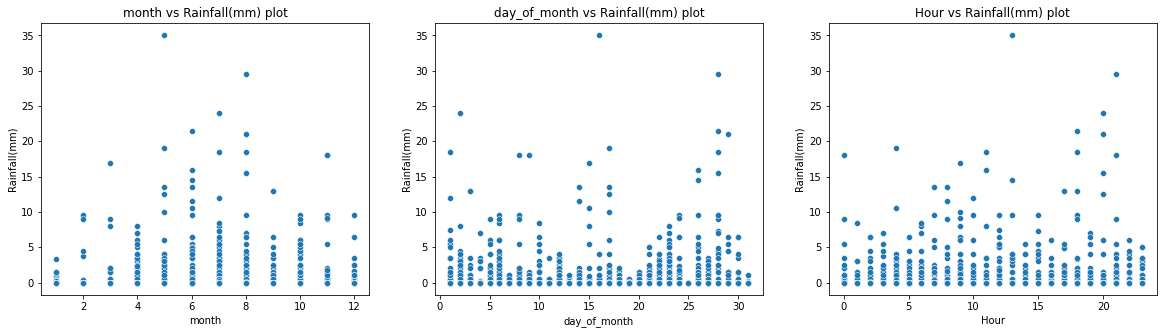

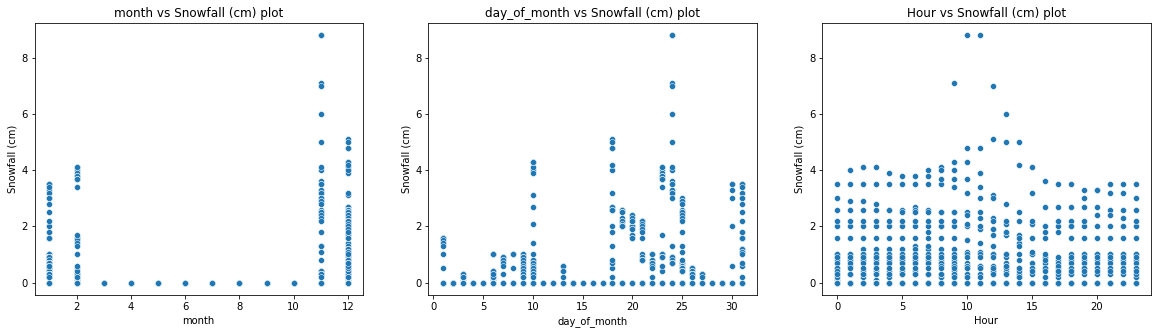

In [ ]:
for col in ['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']:
    fig, ax = plt.subplots(1, 3, figsize=(20,5))
    for index,col1 in enumerate(['month','day_of_month','Hour']):
      sns.scatterplot(x = df[col1], y = df[col], ax=ax[index])
      ax[index].set_title(f"{col1} vs {col} plot")
    plt.show()
    print('\n\n\n')

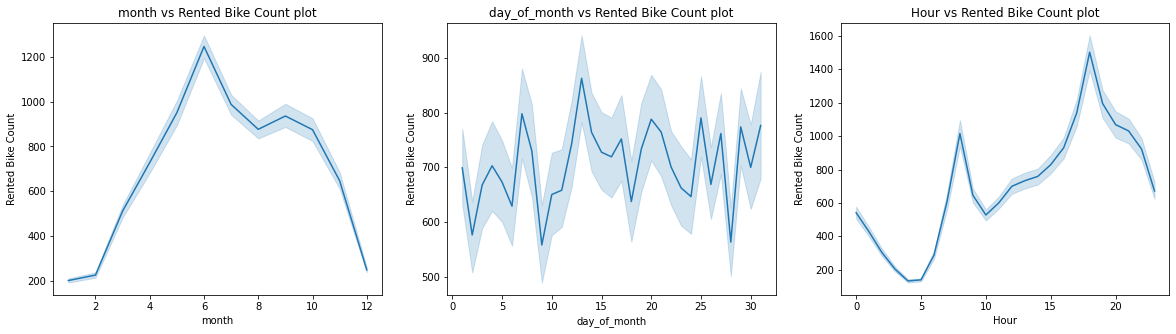

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
for index,col1 in enumerate(['month','day_of_month','Hour']):
  sns.lineplot(x = df[col1], y = df[dep_var], ax=ax[index])
  ax[index].set_title(f"{col1} vs {dep_var} plot")
plt.show()

In [ ]:
# Dropping 'Date' columns as we have created new features month and day_of_month from it.

df.drop(columns = ['Date'], inplace = True)

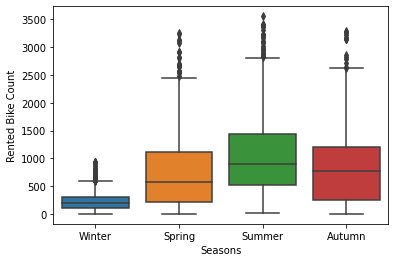

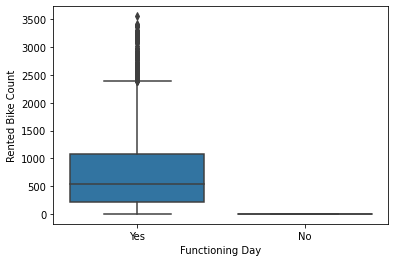

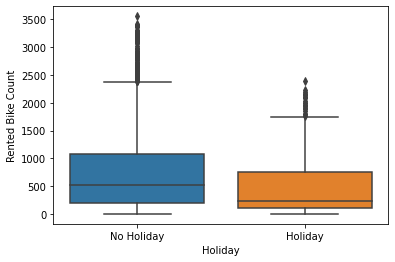

In [ ]:
# Relation of dependent variable with categorical features

for col in ['Seasons','Functioning Day','Holiday']:
  sns.boxplot(x = df[col],y = df['Rented Bike Count'])
  plt.show()

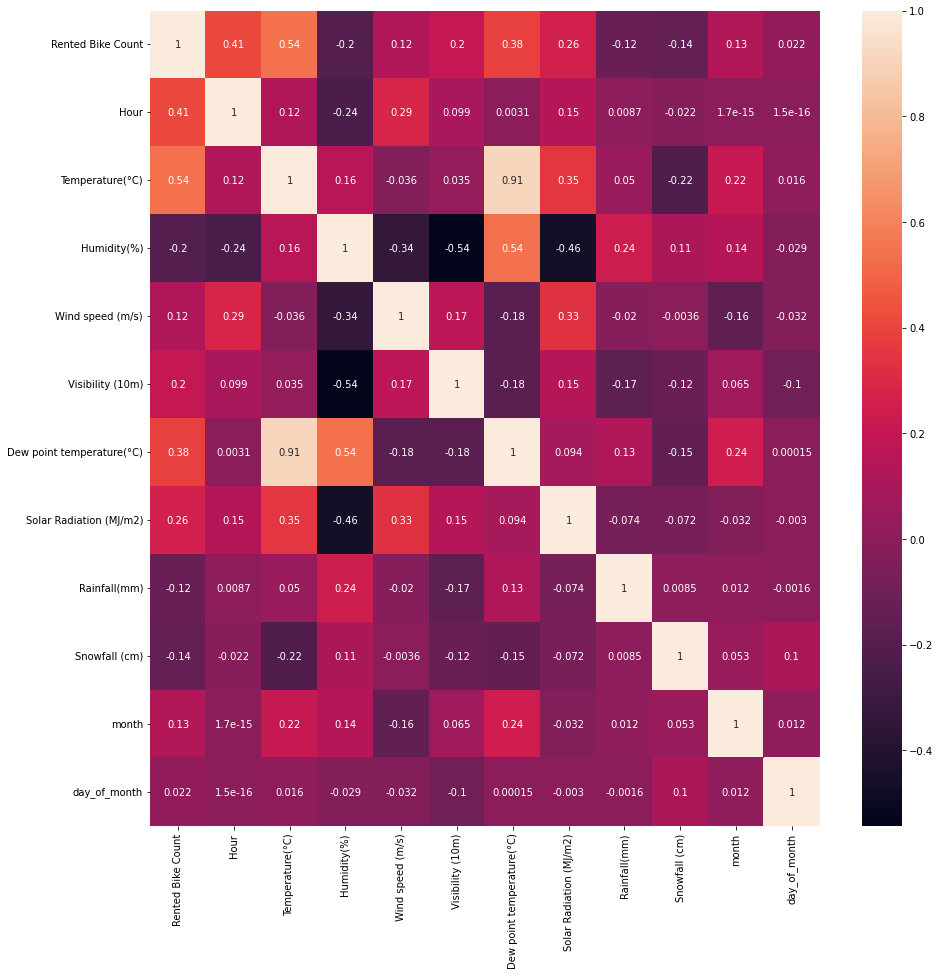

In [ ]:
plt.figure(figsize = (15,15))
corr_df = df.corr()
sns.heatmap(corr_df, annot = True)

## Applying Models

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Defining dictionaries for r2_score of different models
test_r2 = {}
train_r2 = {}

In [ ]:
# defining function for dataframe split into train and test datasets
def data_split(df):
  dep_var = 'Rented Bike Count'
  ind_var = list(set(df.columns)-{dep_var})

  y=df[dep_var]
  x=df[ind_var]

  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
  return x_train, x_test, y_train, y_test

In [ ]:
# defining function for model hyperparameter tuning and training
def gridsearch_model_parameters(model,parameter_dict,x_train,y_train):
  rf_grid = GridSearchCV(estimator = model,
                         param_grid = parameter_dict,
                         cv=5, verbose=1, scoring= 'neg_mean_squared_error')
  rf_grid.fit(x_train,y_train)
  print(f"Best Parameters of optimal model: {rf_grid.best_params_}")
  rf_optimal_model = rf_grid.best_estimator_
  return rf_optimal_model

In [ ]:
# defining function for model evaluation
def evaluating_model(model,x_train,x_test,y_train,y_test,transformed = False):
  y_pred = model.predict(x_test)
  y_train_pred = model.predict(x_train)

  # Calculating mse
  print(f'Test Mean squred error : {mean_squared_error(y_test, y_pred)}')
  print(f'Train mean squred error : {mean_squared_error(y_train,y_train_pred)}')

 # Calculating  R2- score
  test_r2 =  r2_score(y_test, y_pred)
  train_r2 =  r2_score(y_train, y_train_pred)

  if transformed == True :   # We have applied sqrt transformation on our dependent  variable then 
     test_r2 =  r2_score(y_test**2, y_pred**2)
     train_r2 =  r2_score(y_train**2, y_train_pred**2)

  return test_r2,train_r2

1. Linear Regression

Checking Assumptions of Linear Regression

1) Dependent and Independent Variables should follow Gaussian Distribution

In [ ]:
df_reg=df.copy()

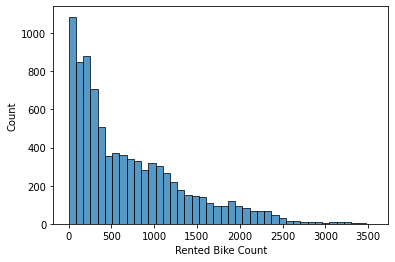

In [ ]:
sns.histplot(df_reg['Rented Bike Count'])

"Rented Bike Count" is positively skewed. So we shall apply Sqrt transformation to remove the skewness

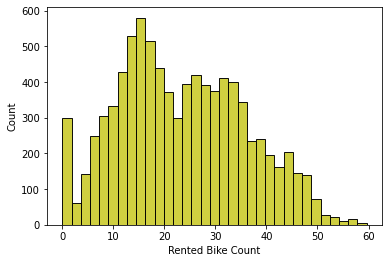

In [ ]:
sns.histplot(np.sqrt(df_reg['Rented Bike Count']),color='y')
plt.show()

In [ ]:
df_reg['Rented Bike Count']

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8760, dtype: int64

In [ ]:
dep_var ='Rented Bike Count'
ind_var = list(set(df_reg)-{dep_var})

In [ ]:
# defining numerical independent features
numeric_features = df_reg.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'month',
       'day_of_month'],
      dtype='object')

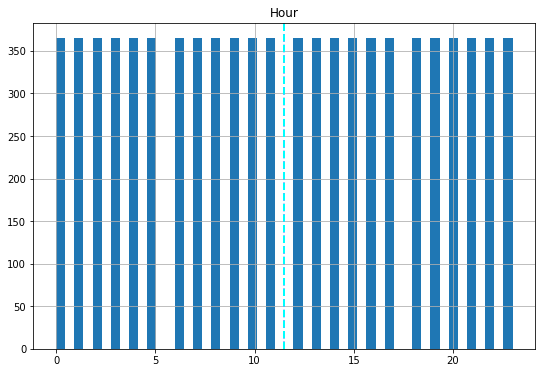

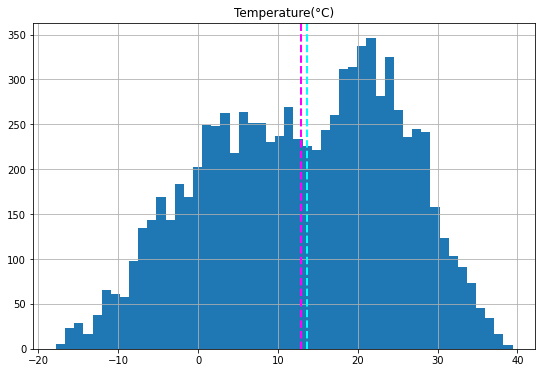

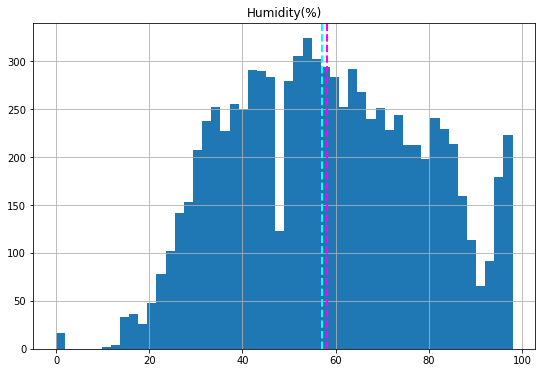

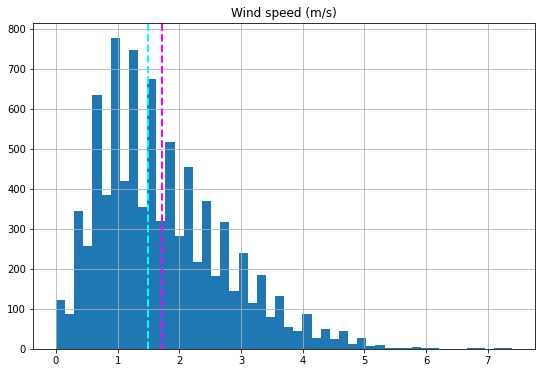

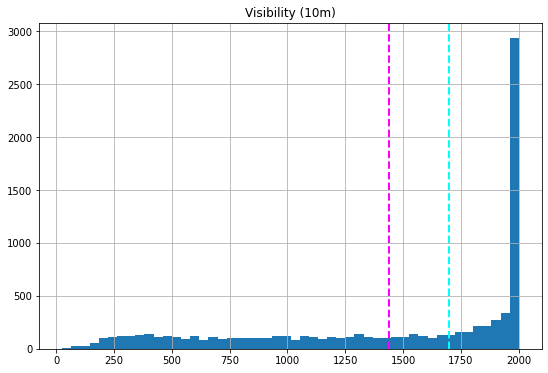

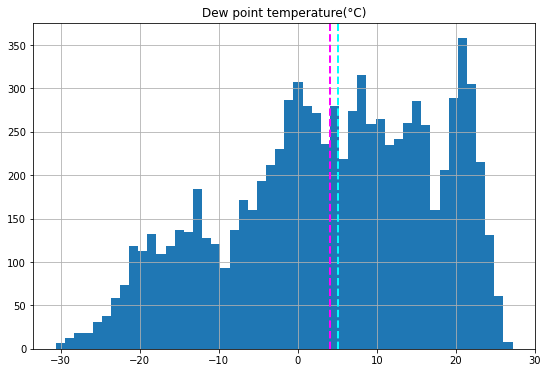

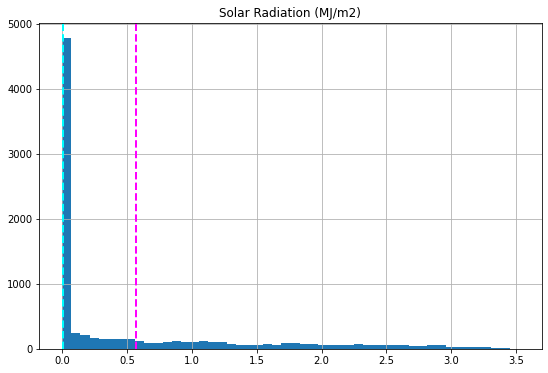

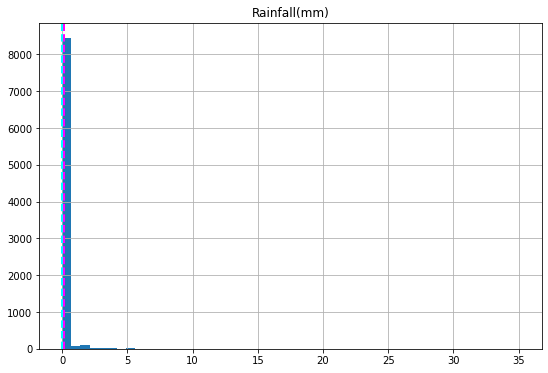

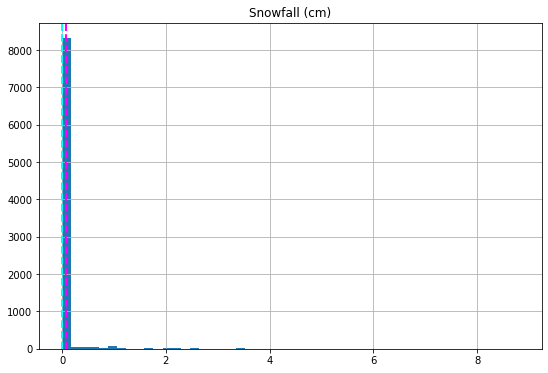

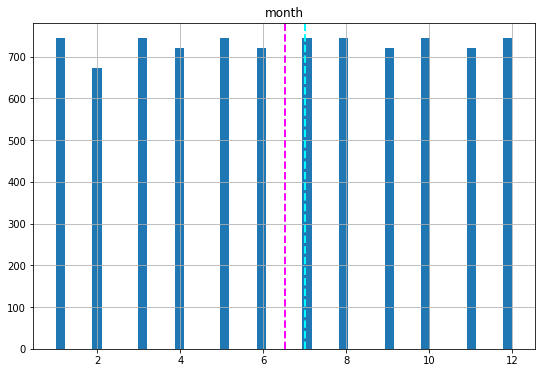

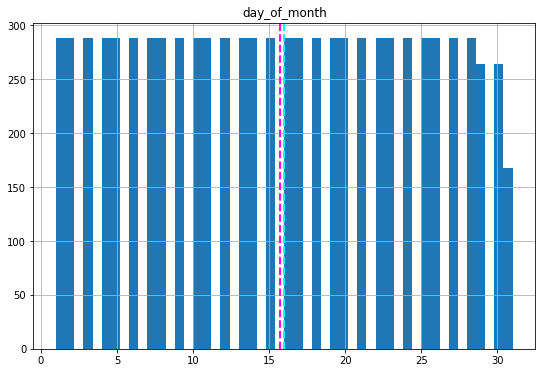

In [ ]:
# Plotting distribution of numerical independent features

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df_reg[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

We see that many features are skewed, positive and negative and many are not. So we will apply sqrt transformation to only moderately to very skewed features

In [ ]:
# Selecting skewed features for transformation

skewed_features = []
for col in numeric_features:
  skewness = df_reg[col].skew(axis = 0)
  if skewness < -0.7 or skewness > 0.7:
    skewed_features.append(col)

In [ ]:
print(skewed_features)

['Rented Bike Count', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


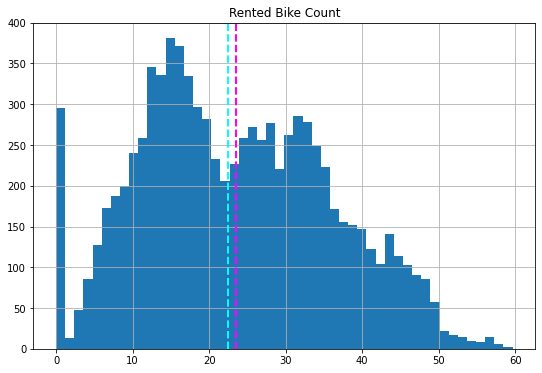

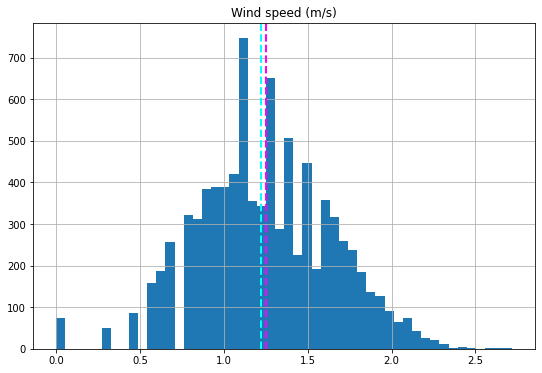

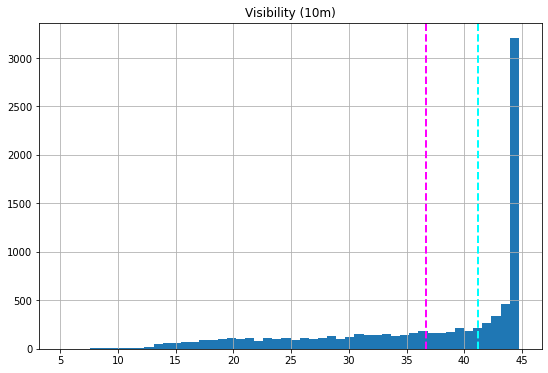

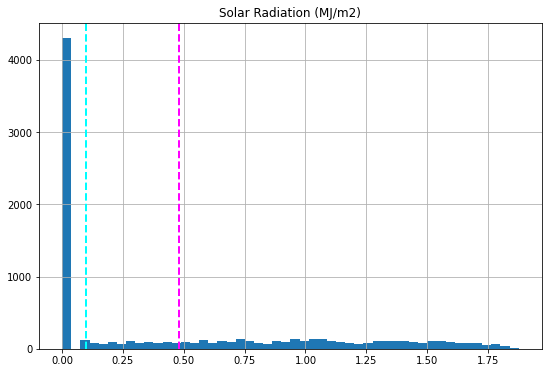

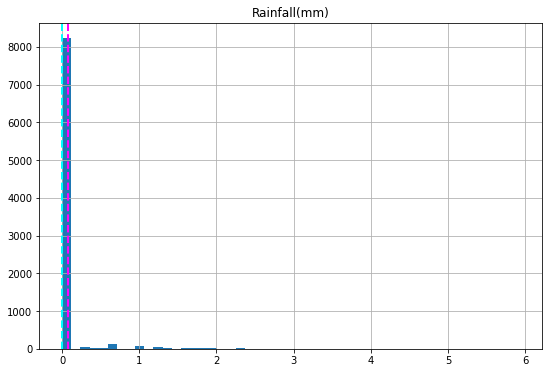

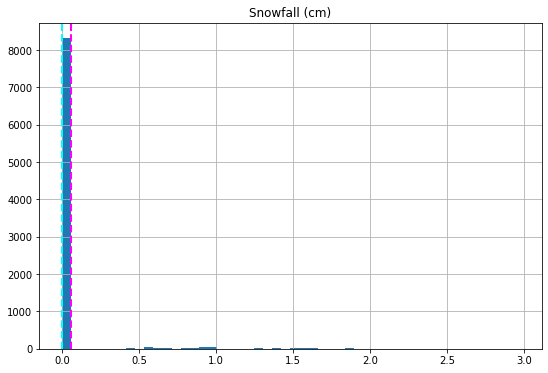

In [ ]:
# Applying sqrt transformation on skewed features and checking distribution

for col in skewed_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(df_reg[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

(2) Checking linear relation between dependent and independnt features.

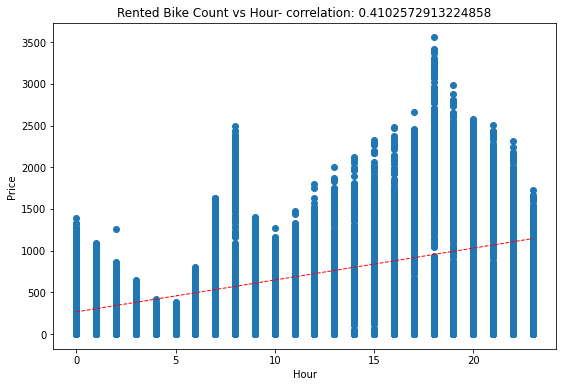

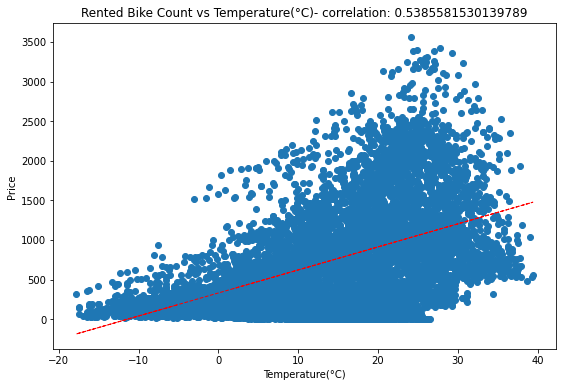

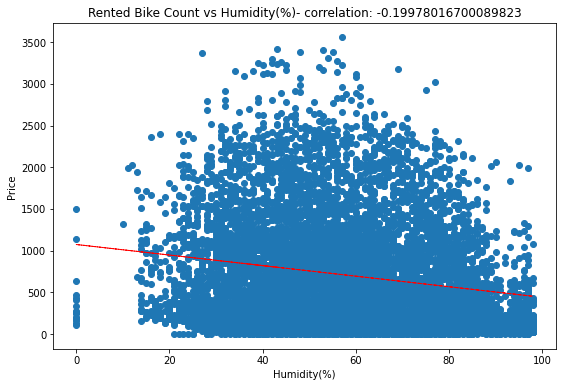

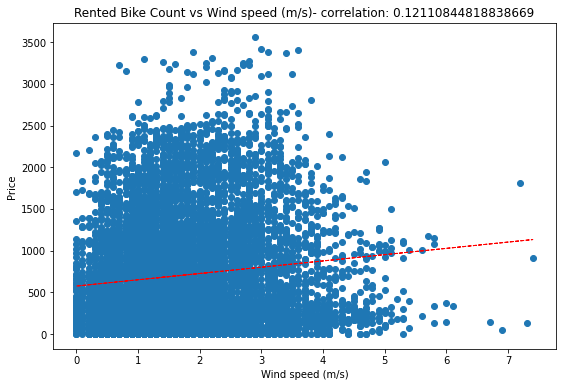

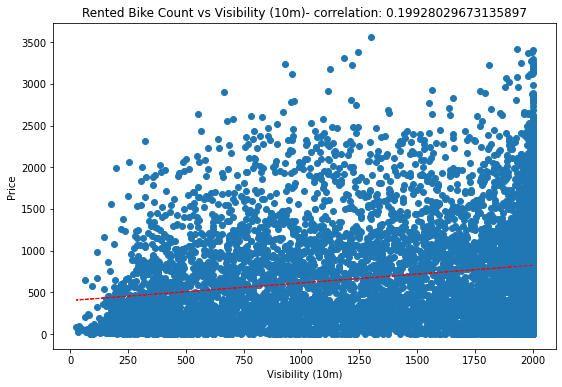

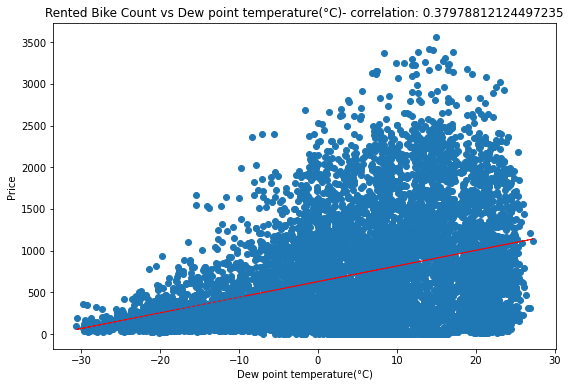

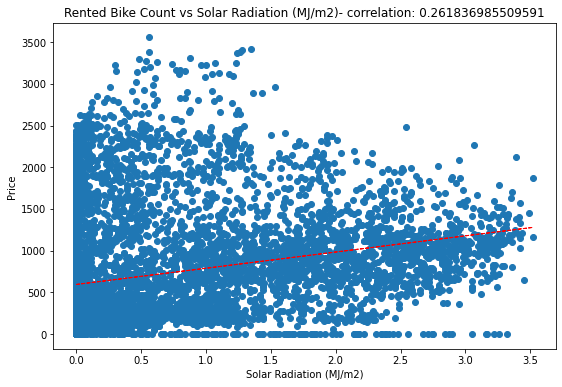

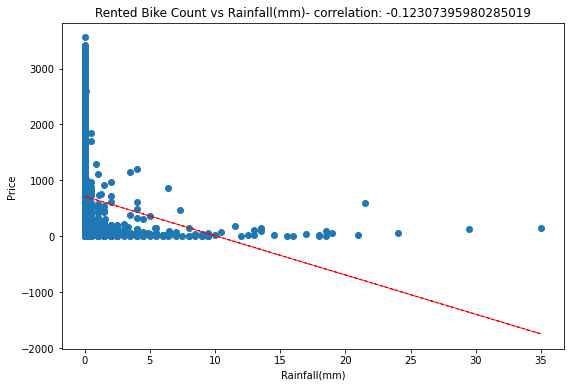

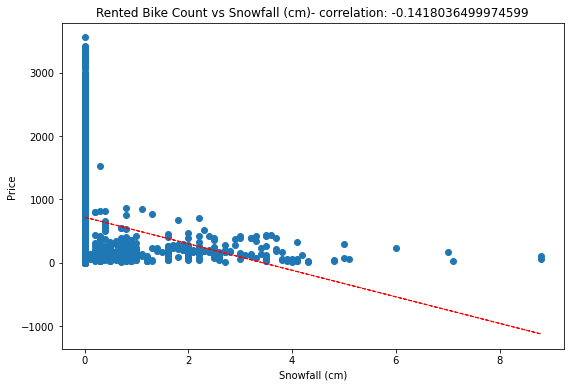

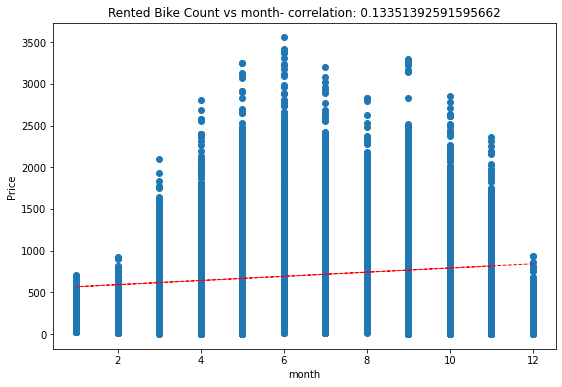

In [ ]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df_reg[col]
    label = df_reg[dep_var]
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Price')
    ax.set_title(dep_var+' vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df_reg[col], df_reg[dep_var], 1)
    y_hat = np.poly1d(z)(df_reg[col])

    plt.plot(df_reg[col], y_hat, "r--", lw=1)

plt.show()

Not very strong linear relation with any independet variable.



(3) Checking and removing multicollinearity.

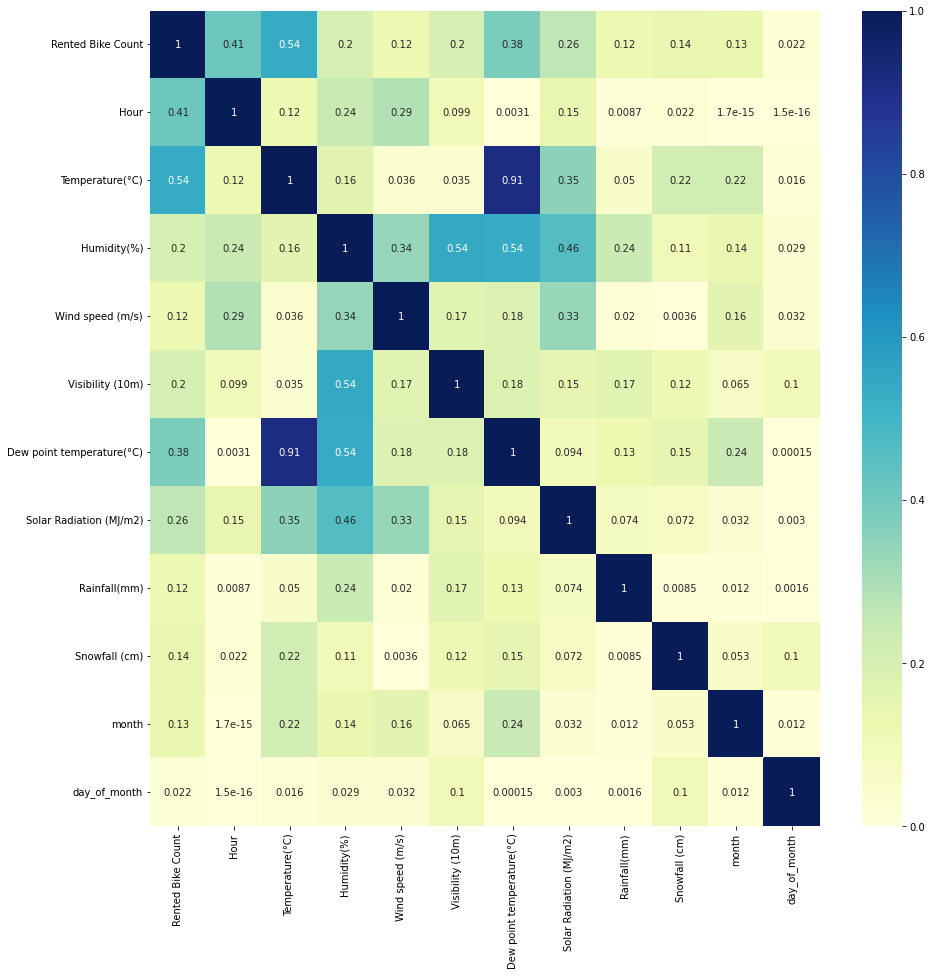

In [ ]:
plt.figure(figsize = (15,15))
corr_df = df_reg.corr()

sns.heatmap(data = np.abs(corr_df), annot = True, cmap="YlGnBu")



'Temperature' and 'Dew point temperature are highly correlated.

Feature Selection

Using VIF to remove multicollinearity.

VIF score should be less than 5 for no multicollinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df_reg[[i for i in df_reg.describe().columns if i not in ["Rented Bike Count"]]])

,variables,VIF
0,Hour,4.425960
1,Temperature(°C),38.389623
2,Humidity(%),8.344305
3,Wind speed (m/s),4.879565
4,Visibility (10m),9.481423
5,Dew point temperature(°C),19.815223
6,Solar Radiation (MJ/m2),2.900819
7,Rainfall(mm),1.082134
8,Snowfall (cm),1.144168
9,month,5.096115


In [ ]:
df_reg.drop(columns = ['Dew point temperature(°C)'],axis = 0, inplace = True)

In [ ]:

calc_vif(df_reg[[i for i in df_reg.describe().columns if i not in ["Rented Bike Count"]]])

,variables,VIF
0,Hour,3.997641
1,Temperature(°C),3.288024
2,Humidity(%),6.802299
3,Wind speed (m/s),4.667341
4,Visibility (10m),5.471035
5,Solar Radiation (MJ/m2),2.275006
6,Rainfall(mm),1.080689
7,Snowfall (cm),1.139759
8,month,5.027060
9,day_of_month,3.776455


In [ ]:
df_reg.drop(columns = ['Humidity(%)'],axis = 0, inplace = True)

In [ ]:

calc_vif(df_reg[[i for i in df_reg.describe().columns if i not in ["Rented Bike Count"]]])

,variables,VIF
0,Hour,3.986126
1,Temperature(°C),2.829777
2,Wind speed (m/s),4.377753
3,Visibility (10m),5.444438
4,Solar Radiation (MJ/m2),1.915451
5,Rainfall(mm),1.047934
6,Snowfall (cm),1.117859
7,month,4.263038
8,day_of_month,3.350386


In [ ]:
df_reg.drop(columns = ['Visibility (10m)'],axis = 0, inplace = True)

In [ ]:
skewed_features.remove('Visibility (10m)')

In [ ]:
calc_vif(df_reg[[i for i in df_reg.describe().columns if i not in ["Rented Bike Count"]]])

,variables,VIF
0,Hour,3.841609
1,Temperature(°C),2.823886
2,Wind speed (m/s),3.848706
3,Solar Radiation (MJ/m2),1.911904
4,Rainfall(mm),1.030481
5,Snowfall (cm),1.107027
6,month,3.626975
7,day_of_month,3.229677


In [ ]:
df_reg['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df_reg['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [ ]:
df_reg['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [ ]:
# preparing data for training model

df_reg=pd.get_dummies(df_reg,columns=['Seasons'])

holiday_l = LabelEncoder()
fday_l = LabelEncoder()


df_reg['holiday_n'] = holiday_l.fit_transform(df_reg['Holiday'])
df_reg['fday_n'] = fday_l.fit_transform(df_reg['Functioning Day'])

In [ ]:
df_reg.drop(columns = ['Functioning Day','Holiday'], inplace = True)

In [ ]:
df_reg.head()

,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,day_of_month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,holiday_n,fday_n
0,254,0,-5.2,2.2,0.0,0.0,0.0,12,1,0,0,0,1,1,1
1,204,1,-5.5,0.8,0.0,0.0,0.0,12,1,0,0,0,1,1,1
2,173,2,-6.0,1.0,0.0,0.0,0.0,12,1,0,0,0,1,1,1
3,107,3,-6.2,0.9,0.0,0.0,0.0,12,1,0,0,0,1,1,1
4,78,4,-6.0,2.3,0.0,0.0,0.0,12,1,0,0,0,1,1,1


In [ ]:
features = list(set(df_reg.columns) - {'Rented Bike Count'})

In [ ]:
# Applying sqrt transformation on skewed features
for col in skewed_features:
  df_reg[col] = df_reg[col].apply(lambda x: np.sqrt(x))

In [ ]:
df_reg[features]

,Wind speed (m/s),Seasons_Summer,Hour,holiday_n,Seasons_Spring,Snowfall (cm),Rainfall(mm),month,Seasons_Autumn,day_of_month,Solar Radiation (MJ/m2),Temperature(°C),Seasons_Winter,fday_n
0,1.483240,0,0,1,0,0.0,0.0,12,0,1,0.0,-5.2,1,1
1,0.894427,0,1,1,0,0.0,0.0,12,0,1,0.0,-5.5,1,1
2,1.000000,0,2,1,0,0.0,0.0,12,0,1,0.0,-6.0,1,1
3,0.948683,0,3,1,0,0.0,0.0,12,0,1,0.0,-6.2,1,1
4,1.516575,0,4,1,0,0.0,0.0,12,0,1,0.0,-6.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1.612452,0,19,1,0,0.0,0.0,11,1,30,0.0,4.2,0,1
8756,1.516575,0,20,1,0,0.0,0.0,11,1,30,0.0,3.4,0,1
8757,0.547723,0,21,1,0,0.0,0.0,11,1,30,0.0,2.6,0,1
8758,1.000000,0,22,1,0,0.0,0.0,11,1,30,0.0,2.1,0,1


In [ ]:
# rescaling features
from scipy.stats import zscore

df_reg[features] = df_reg[features].apply(zscore)

In [ ]:
df_reg[features]

,Wind speed (m/s),Seasons_Summer,Hour,holiday_n,Seasons_Spring,Snowfall (cm),Rainfall(mm),month,Seasons_Autumn,day_of_month,Solar Radiation (MJ/m2),Temperature(°C),Seasons_Winter,fday_n
0,0.577973,-0.580514,-1.661325,0.227757,-0.580514,-0.211041,-0.206192,1.587648,-0.576296,-1.673503,-0.821492,-1.513957,1.748015,0.18668
1,-0.878614,-0.580514,-1.516862,0.227757,-0.580514,-0.211041,-0.206192,1.587648,-0.576296,-1.673503,-0.821492,-1.539074,1.748015,0.18668
2,-0.617451,-0.580514,-1.372399,0.227757,-0.580514,-0.211041,-0.206192,1.587648,-0.576296,-1.673503,-0.821492,-1.580936,1.748015,0.18668
3,-0.744396,-0.580514,-1.227936,0.227757,-0.580514,-0.211041,-0.206192,1.587648,-0.576296,-1.673503,-0.821492,-1.597680,1.748015,0.18668
4,0.660438,-0.580514,-1.083473,0.227757,-0.580514,-0.211041,-0.206192,1.587648,-0.576296,-1.673503,-0.821492,-1.580936,1.748015,0.18668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.897614,-0.580514,1.083473,0.227757,-0.580514,-0.211041,-0.206192,1.297612,1.735220,1.623357,-0.821492,-0.726961,-0.572078,0.18668
8756,0.660438,-0.580514,1.227936,0.227757,-0.580514,-0.211041,-0.206192,1.297612,1.735220,1.623357,-0.821492,-0.793939,-0.572078,0.18668
8757,-1.736281,-0.580514,1.372399,0.227757,-0.580514,-0.211041,-0.206192,1.297612,1.735220,1.623357,-0.821492,-0.860918,-0.572078,0.18668
8758,-0.617451,-0.580514,1.516862,0.227757,-0.580514,-0.211041,-0.206192,1.297612,1.735220,1.623357,-0.821492,-0.902779,-0.572078,0.18668


In [ ]:
# Splitting dataframe into training and testing dataset

x_train, x_test, y_train, y_test = data_split(df_reg)

In [ ]:
# Defining model and training model

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)

In [ ]:
# Evaluating model

test_r2_lr ,train_r2_lr = evaluating_model(reg, x_train, x_test, y_train, y_test, True)

Test Mean squred error : 55.275311134538626
Train mean squred error : 52.59987693572177


In [ ]:

test_r2['Linear Regression'] = test_r2_lr
train_r2['Linear Regression'] = train_r2_lr

In [ ]:
print(f"R2-Score for training dataset : {train_r2_lr}")
print(f"R2-Score for testing dataset : {test_r2_lr}")

R2-Score for training dataset : 0.5774579372594847
R2-Score for testing dataset : 0.5529567165966817


## 2)Lasso

In [ ]:
from sklearn.linear_model import Lasso, Ridge
# Defining model and training model
lasso = Lasso( )
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,0.0014]}

lasso_model = gridsearch_model_parameters(lasso, parameters, x_train, y_train)

  

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.718e+04, tolerance: 8.802e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.010e+04, tolerance: 8.697e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

Best Parameters of optimal model: {'alpha': 0.01}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.010e+04, tolerance: 8.672e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
test_r2_ls ,train_r2_ls = evaluating_model(lasso_model, x_train, x_test, y_train, y_test, True)

Test Mean squred error : 55.25361990251694
Train mean squred error : 52.600804939346624


In [ ]:
test_r2['Lasso'] = test_r2_ls
train_r2['Lasso'] = train_r2_ls

In [ ]:
print(f"R2-Score for training dataset : {train_r2_ls}")
print(f"R2-Score for testing dataset : {test_r2_ls}")

R2-Score for training dataset : 0.5770576276290711
R2-Score for testing dataset : 0.5527127172329713


## 3) Ridge

In [ ]:
# Defining model and training model

from sklearn.linear_model import  Ridge


ridge = Ridge()
parameters = {'alpha': [1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,0.0014]}
ridge_model = gridsearch_model_parameters(ridge, parameters, x_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters of optimal model: {'alpha': 20}


In [ ]:
# Evaluating model

test_r2_rg ,train_r2_rg = evaluating_model(ridge_model, x_train, x_test, y_train, y_test, True)

Test Mean squred error : 55.25251393957152
Train mean squred error : 52.60081795187103


In [ ]:
test_r2['Ridge'] = test_r2_rg
train_r2['Ridge'] = train_r2_rg

In [ ]:
print(f"R2-Score for training dataset : {train_r2_rg}")
print(f"R2-Score for testing dataset : {test_r2_rg}")

R2-Score for training dataset : 0.5769388728129895
R2-Score for testing dataset : 0.5526079646490021


## 4)Elastic net

In [ ]:
# Defining model

from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.0014],'l1_ratio':[0.5,0.6,0.7,0.8]}
en_regressor = gridsearch_model_parameters(elasticnet, parameters, x_train, y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.884e+04, tolerance: 8.802e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.156e+04, tolerance: 8.697e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

Best Parameters of optimal model: {'alpha': 0.0014, 'l1_ratio': 0.5}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.617e+04, tolerance: 1.088e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
# Evaluating model

test_r2_en ,train_r2_en = evaluating_model(en_regressor, x_train, x_test, y_train, y_test, True)

Test Mean squred error : 55.26815247260758
Train mean squred error : 52.599946815383575


In [ ]:
test_r2['ElasticNet'] = test_r2_en
train_r2['ElasticNet'] = train_r2_en

In [ ]:
print(f"R2-Score for training dataset : {train_r2_en}")
print(f"R2-Score for testing dataset : {test_r2_en}")

R2-Score for training dataset : 0.5773076683583269
R2-Score for testing dataset : 0.5528590516064515


## 5) Decision Tree Regressor

In [ ]:
# importing Decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
data=df.copy()

In [ ]:
# Preparing data for training model

data=pd.get_dummies(data,columns=['Seasons'])
# Label encoding the holiday and functioning day
holiday_l = LabelEncoder()
fday_l = LabelEncoder()

data['holiday_n'] = holiday_l.fit_transform(data['Holiday'])
data['fday_n'] = fday_l.fit_transform(data['Functioning Day'])

In [ ]:
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,month,day_of_month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,holiday_n,fday_n
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,12,1,0,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,12,1,0,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,No Holiday,Yes,12,1,0,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,12,1,0,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,No Holiday,Yes,12,1,0,0,0,1,1,1


In [ ]:
# Drop the original column State from the dataframe
data.drop(columns = ['Holiday','Functioning Day'], inplace = True)

In [ ]:
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,day_of_month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,holiday_n,fday_n
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,1,0,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,1,0,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,1,0,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,1,0,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,1,0,0,0,1,1,1


In [ ]:
# splitting dataframe

x_train, x_test, y_train, y_test = data_split(data)

In [ ]:
# Defining parameter dictionary for hyperparameter tuning

max_leaf_nodes = [7,9,10,15,20]
max_depth = [2,4,5]
min_samples_split = [3,5,6]

param_dict = {'max_leaf_nodes' : max_leaf_nodes,'max_depth' : max_depth,'min_samples_split' : min_samples_split}

In [ ]:
# Defining model and traing model
regressor = DecisionTreeRegressor( random_state=0)

optimal_model = gridsearch_model_parameters(regressor, param_dict, x_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Parameters of optimal model: {'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_split': 3}


In [ ]:
#Evaluating model
test_r2_dt,train_r2_dt = evaluating_model(optimal_model, x_train, x_test, y_train, y_test)

Test Mean squred error : 125508.37544511296
Train mean squred error : 113611.95535322157


In [ ]:
test_r2['Decision tree'] = test_r2_dt
train_r2['Decision tree'] = train_r2_dt

In [ ]:
print(f"R2-Score for training dataset : {train_r2_dt}")
print(f"R2-Score for testing dataset : {test_r2_dt}")

R2-Score for training dataset : 0.7267669865897723
R2-Score for testing dataset : 0.698765129536723


## 6)Random Forest

In [ ]:

from sklearn.ensemble import RandomForestRegressor

In [ ]:
# defing random forest regressor and parameter dictionary for hyperparameter tuning
rf_regressor = RandomForestRegressor()

param_dict = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}

optimal_model = gridsearch_model_parameters(rf_regressor, param_dict, x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters of optimal model: {'max_depth': 7, 'n_estimators': 100}


In [ ]:
# Evaluating model
test_r2_rf,train_r2_rf = evaluating_model(optimal_model, x_train, x_test, y_train, y_test)

Test Mean squred error : 78236.90707793194
Train mean squred error : 64884.16601727288


In [ ]:
test_r2['Random forest'] = test_r2_rf
train_r2['Random forest'] = train_r2_rf

In [ ]:
print(f"R2-Score for training dataset : {train_r2_rf}")
print(f"R2-Score for testing dataset : {test_r2_rf}")

R2-Score for training dataset : 0.8439557162061796
R2-Score for testing dataset : 0.8122222163621675


Comparing Models

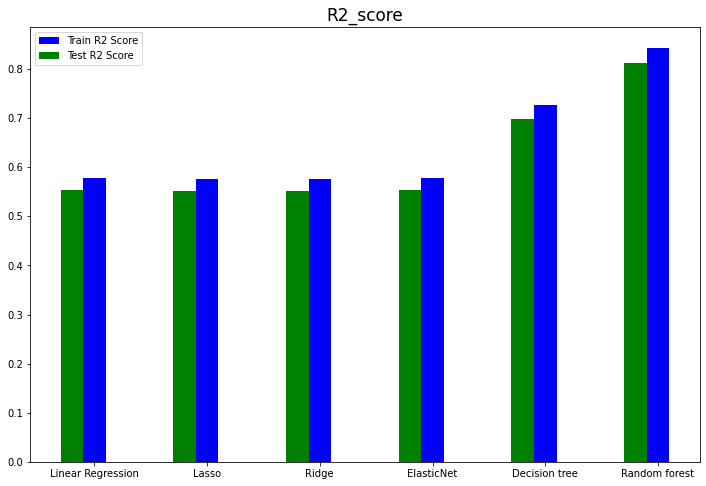

In [ ]:
plt.figure(figsize = (12,8))
X = np.arange(len(train_r2))
ax = plt.subplot(111)
ax.bar(X, train_r2.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, test_r2.values(), width=0.2, color='g', align='center')
ax.legend(('Train R2 Score','Test R2 Score'))
plt.xticks(X, test_r2.keys())
plt.title("R2_score", fontsize=17)
plt.show()